# EDA on global terrorism data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset

In [1]:
import pandas as pd

file_path = r'C:\Users\ppava\Downloads\globalterrorismdb_0718dist.csv'

try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1', low_memory=False)
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File '{file_path}' not found. Please check the file path and try again.")


Data loaded successfully.


In [2]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Understanding the dataset

In [3]:
data.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data.shape

(181691, 135)

In [6]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


# prep ing the dataset for analysis

In [8]:
data.rename(columns={'iyear':'Year',
                     'imonth':'Month',
                     'iday':'Day',
                     'country_txt':'Country',
                     'provstate':'state',
                     'region_txt':'Region',
                     'attacktype1_txt':'AttackType',
                     'target1':'Target',
                     'nkill':'Killed',
                     'nwound':'Wounded',
                     'summary':'Summary',
                     'gname':'Group',
                     'targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type',
                     'motive':'Motive'},
                     inplace=True)

In [9]:
data.head()

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
new_data=data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]


In [11]:
#modified data
new_data.head()

,Year,Month,Day,Country,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
new_data.columns 

Index(['Year', 'Month', 'Day', 'Country', 'state', 'Region', 'city',
       'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded', 'Target',
       'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive'],
      dtype='object')

In [13]:
new_data.shape

(181691, 18)

# Cleaning the data

In [14]:
#Checking for null values
new_data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Day'}>],
       [<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'Killed'}>],
       [<AxesSubplot:title={'center':'Wounded'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

<Figure size 2160x1440 with 0 Axes>

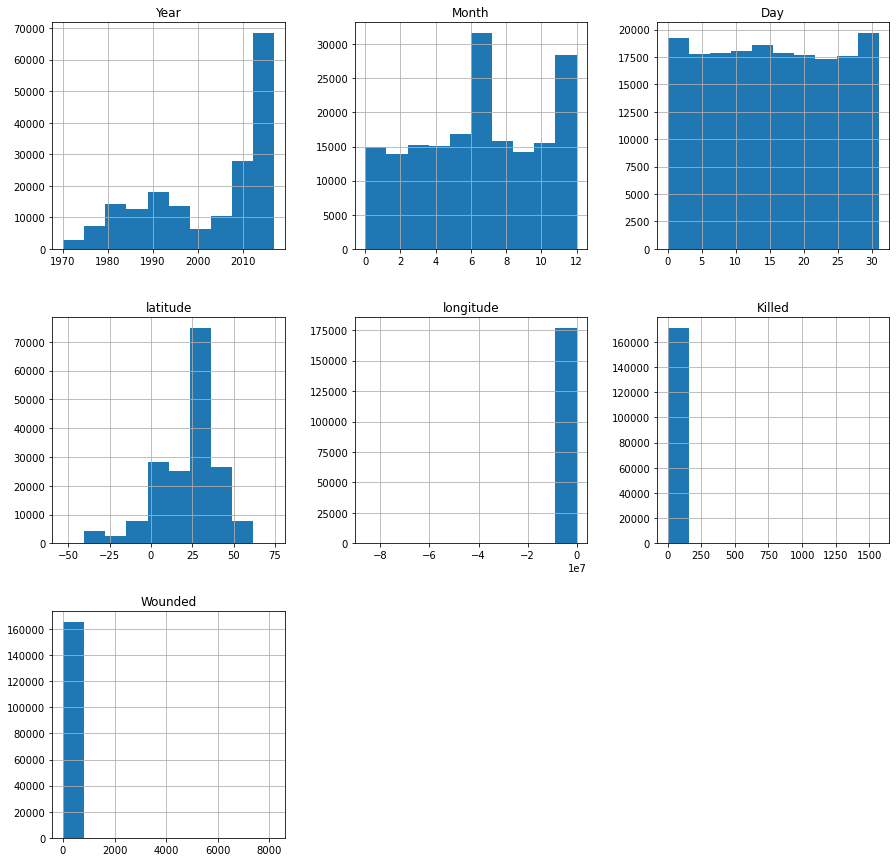

In [17]:
plt.figure(figsize=(30,20))
new_data.hist(figsize=(15,15))

<AxesSubplot:>

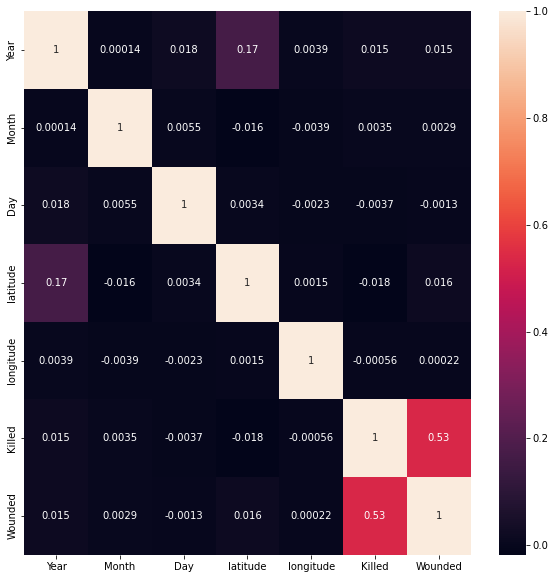

In [18]:
plt.figure(figsize=(10,10))
new_data.corr()
sns.heatmap(new_data.corr(), annot=True)

 # Terrorist activities in each region is demostrated below

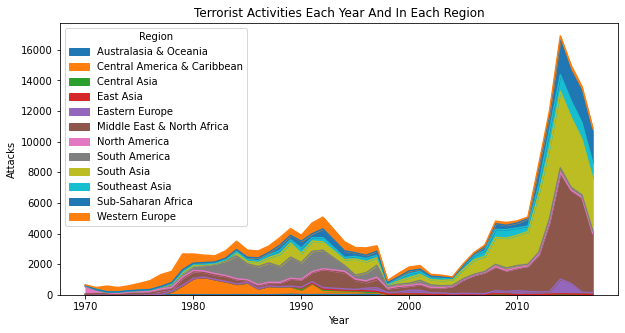

In [20]:
#Plotting area plot
pd.crosstab(new_data.Year, new_data.Region).plot(kind='area',figsize=(10,5))
plt.title('Terrorist Activities Each Year And In Each Region')
plt.ylabel('Attacks')
plt.show()

In [21]:
# OBSERVATION: Australasia, SouthEast Asia and South Asia have large number of terrorist activities

 # Counting the terrorist activities each year

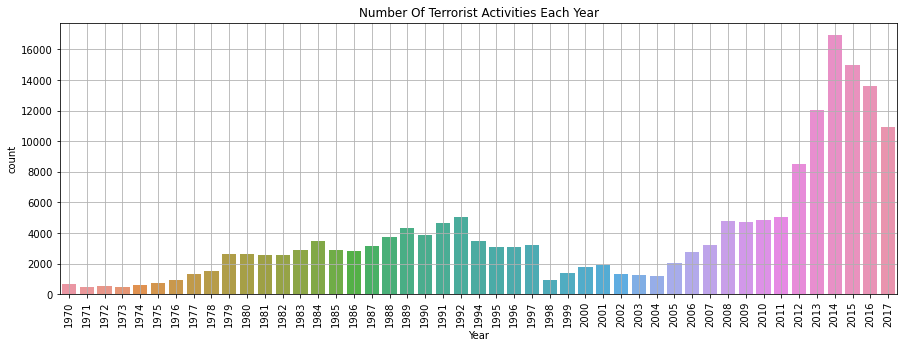

In [22]:
plt.subplots(figsize=(15,5))
sns.countplot(x = new_data['Year'])
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.grid()
plt.show()

In [23]:
# OBSERVATION: 2014 and 2015 had large number of terrorist activities and its gradually increasing from 1970

# Calculating the percentage of attacks that has happened since 1970 and 2017

In [24]:
Year=new_data.Year.value_counts().to_dict()
rate=((Year[2017]-Year[1970])/Year[2017])*100
print(Year[1970],'number of attacks happened in 1970 ')
print(Year[2017],'number of attacks happened in 2017')
print('Total number of attacks from 1970 has increased by',np.round(rate,0),'% till 2017')

651 number of attacks happened in 1970 
10900 number of attacks happened in 2017
Total number of attacks from 1970 has increased by 94.0 % till 2017


# Types of attack performed

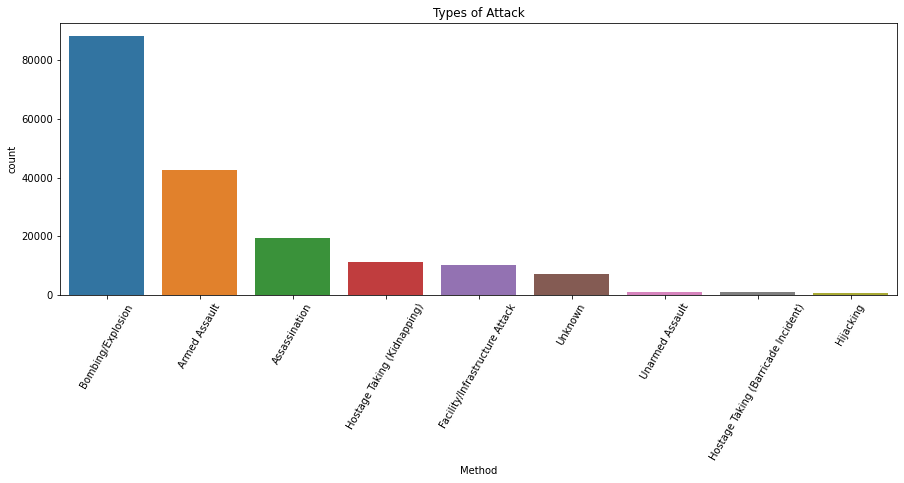

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(x = new_data['AttackType'], order = new_data['AttackType'].value_counts().index)
plt.xticks(rotation=60)
plt.xlabel('Method')
plt.title('Types of Attack')
plt.show()

In [27]:
# OBSERVATION: Bombing and Explosion attacks are mostly used by terrorist and hijacking is least used

 # Different types of target

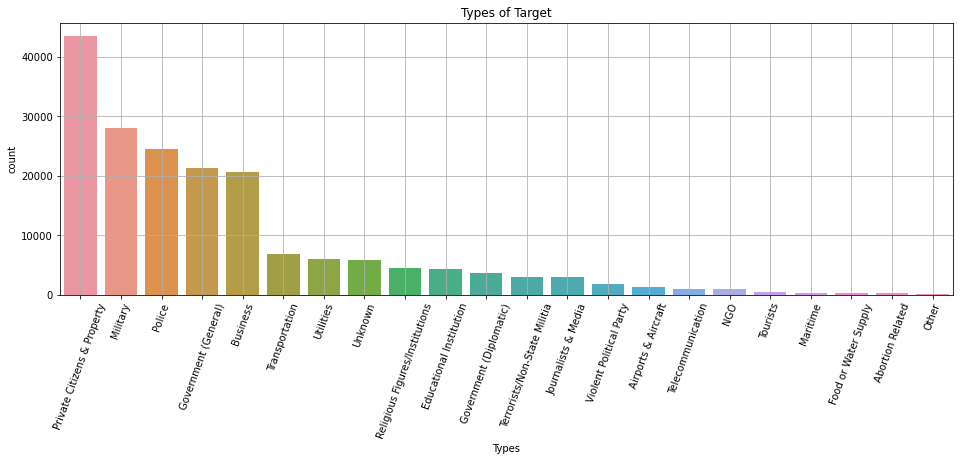

In [28]:
plt.figure(figsize=(16,5))
sns.countplot(x = new_data['Target_type'], order=new_data['Target_type'].value_counts().index)
plt.xticks(rotation=70)
plt.xlabel('Types')
plt.title('Types of Target')
plt.grid()
plt.show()

In [29]:
 # OBSERVATION: Private citizens and Property are targeted widely by terrorist when compared to other people


 # Count of terrorist attacks in each country and regions

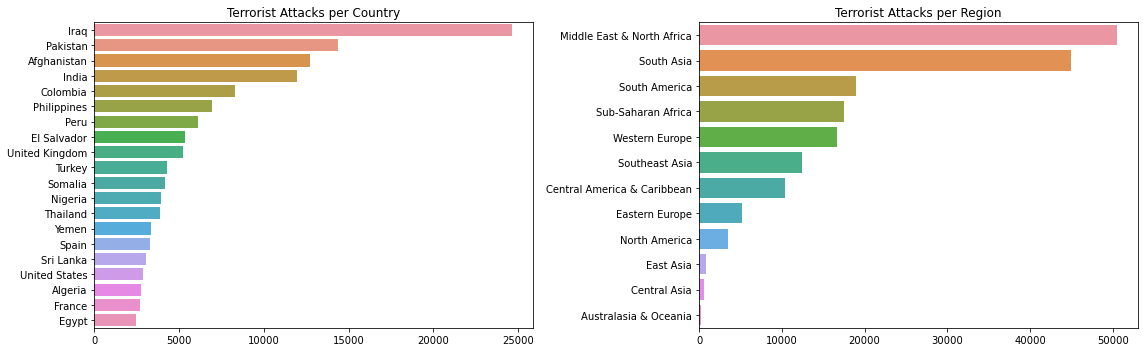

In [30]:
fig,axes = plt.subplots(figsize=(16,5),nrows=1,ncols=2)
sns.barplot(x = new_data['Country'].value_counts()[:20].values, y = new_data['Country'].value_counts()[:20].index, ax=axes[0]);
axes[0].set_title('Terrorist Attacks per Country')
sns.barplot(x=new_data['Region'].value_counts().values, y=new_data['Region'].value_counts().index, ax=axes[1])
axes[1].set_title('Terrorist Attacks per Region')
fig.tight_layout()
plt.show()

In [32]:
# OBSERVATION: Count of terrorist attacks is more in Iraq, Pakisthan and Afghanisthan and it is more in Middle east
# and north africa regions

# Count of attacks in each country using globe


In [33]:
df=new_data.groupby(['Country'],as_index=False).count()


In [34]:
df

,Country,Year,Month,Day,state,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,Afghanistan,12731,12731,12731,12731,12731,12592,12639,12639,12731,12362,11994,12715,12617,12731,12731,12731,3586
1,Albania,80,80,80,71,80,80,79,79,80,76,76,78,25,80,80,80,17
2,Algeria,2743,2743,2743,2706,2743,2736,2617,2617,2743,2719,2630,2708,1612,2743,2743,2743,1507
3,Andorra,1,1,1,1,1,1,0,0,1,0,0,1,0,1,1,1,0
4,Angola,499,499,499,499,499,499,465,465,499,482,462,495,133,499,499,499,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,Yemen,3347,3347,3347,3347,3347,3347,3270,3270,3347,3083,2935,3347,3264,3347,3347,3347,717
201,Yugoslavia,203,203,203,198,203,203,202,202,203,195,193,202,106,203,203,203,106
202,Zaire,50,50,50,50,50,50,44,44,50,50,48,50,3,50,50,50,0
203,Zambia,62,62,62,62,62,62,54,54,62,60,60,62,18,62,62,62,17


In [35]:
df['Killed'].max()

23911

 # Country that suffered maximum and minimum attacks

In [36]:
max_count=df['Year'].max()
max_id=df['Year'].idxmax()
max_name=df['Country'][max_id]
min_count=df['Year'].min()
min_id=df['Year'].idxmin()
min_name=df['Country'][min_id]

print(max_name,'has suffered the maximum number of terror attacks of',max_count)
print(min_name,'has suffered the minimum number of terror attacks of',min_count)

Iraq has suffered the maximum number of terror attacks of 24636
Andorra has suffered the minimum number of terror attacks of 1


In [37]:
max_count2=df['Killed'].max()
max_id2=df['Killed'].idxmax()
max_name2=df['Country'][max_id]
min_count2=df['Killed'].min()
min_id2=df['Killed'].idxmin()
min_name2=df['Country'][min_id]

print(max_name2,'has suffered the maximum number of people killed are',max_count2)
print(min_name2,'has suffered the minimum number of people killed are',min_count2)

Iraq has suffered the maximum number of people killed are 23911
Andorra has suffered the minimum number of people killed are 0


# Finding out the terrorist organizations that carried out the operations in different country


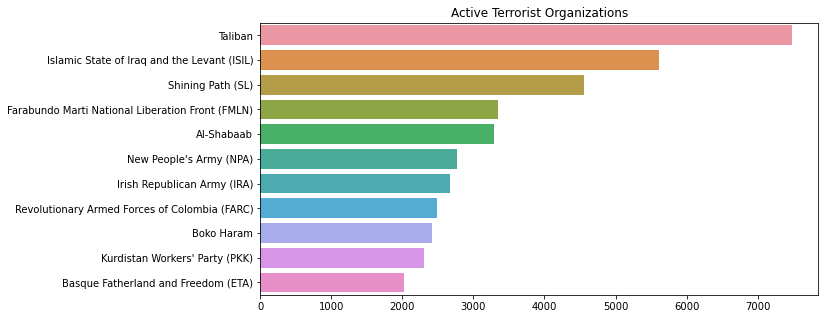

In [38]:
plt.subplots(figsize=(10,5))
sns.barplot(y=new_data['Group'].value_counts()[1:12].index,x=new_data['Group'].value_counts()[1:12].values)
plt.title('Active Terrorist Organizations')
plt.show()

# Analysis of terrorism before the war and after the war

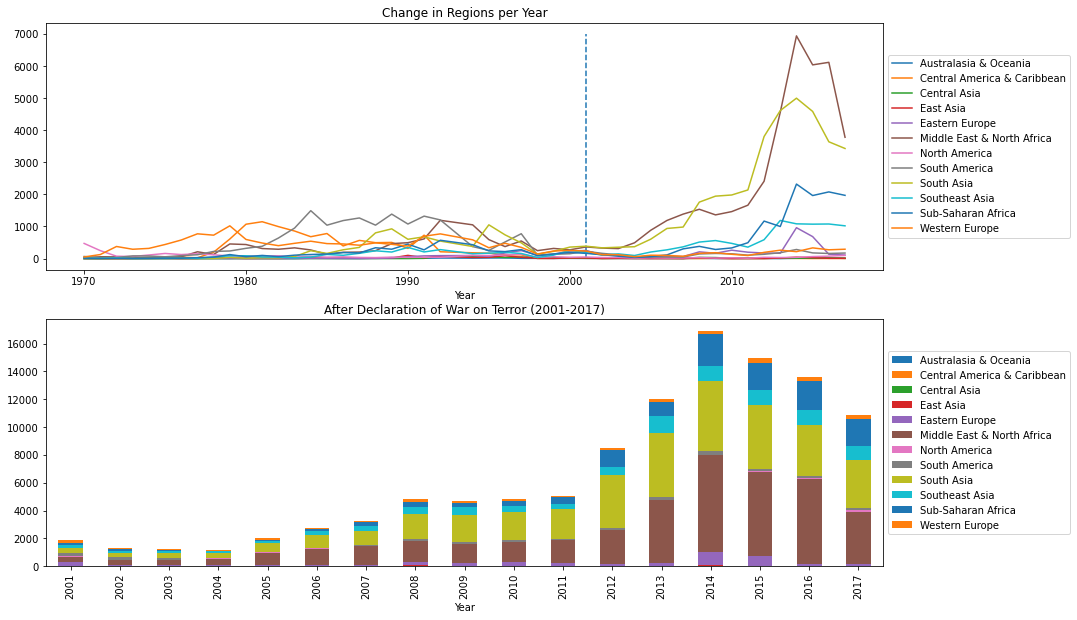

In [39]:
data_after = new_data[new_data['Year']>=2001]
fig,ax = plt.subplots(figsize=(15,10), nrows=2, ncols=1)
ax[0] = pd.crosstab(new_data.Year, new_data.Region).plot(ax=ax[0])
ax[0].set_title('Change in Regions per Year')
ax[0].legend(loc='center left', bbox_to_anchor = (1,0.5))
ax[0].vlines(x=2001, ymin=0, ymax=7000, linestyles='--')
pd.crosstab(data_after.Year,data_after.Region).plot.bar(stacked=True, ax=ax[1])
ax[1].set_title('After Declaration of War on Terror (2001-2017)')
ax[1].legend(loc='center left', bbox_to_anchor = (1,0.5))
plt.show()

In [40]:
print('Country with Highest Terrorist Attacks:',df['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['Killed'].max(),'that took place in',df.loc[df['Killed'].idxmax()].Country)


Country with Highest Terrorist Attacks: Afghanistan
Regions with Highest Terrorist Attacks: 1
Maximum people killed in an attack are: 23911 that took place in Iraq


# Final Observations

In [ ]:
# Iraq has suffered the maximum number of terror attacks

# Andorra has suffered the minimum number of terror attacks

#Total number of attacks from 1970 has increased drastically till 2017

#South Asia, Australasia and Southeast asia have large number of terrorist activities

#Middle East and North Africa seen to have places of serious attacks

#Private citizens and Property are targeted widely by terrorist when compared to other people

#Muslims are attacked most by these attacks

#Iraq, Afghanistan and Pakistan are the most damaged countries